# 第一部分：张量运算

scaler > vector > matrix > tensor  
A scalar is 0 th order tensor, a vector is 1 st order tensor and a matrix is 2 nd order tensor.

In [2]:
torch.cuda.is_available() # check your GPU is working fine

True

### 张量的定义

In [4]:
import torch

# 创建tensor，用dtype指定类型。注意类型要匹配
a = torch.tensor(1.0, dtype=torch.float) # or FloatTensor(1.0)
b = torch.tensor(1, dtype=torch.long) 
c = torch.tensor(1.0, dtype=torch.int8) # or IntTensor (1)
print(a, b, c)

tensor(1.) tensor(1) tensor(1, dtype=torch.int8)


In [7]:
import sys
print(sys.getsizeof(a.item()), sys.getsizeof(b.item()), sys.getsizeof(c.item())) # in bits

24 28 28


In [8]:
import torch
x = torch.rand(3, 2, 2) 
print(x)
print(x.shape)

tensor([[[0.4891, 0.5777],
         [0.6134, 0.2894]],

        [[0.2896, 0.8937],
         [0.7426, 0.0927]],

        [[0.5749, 0.9190],
         [0.2778, 0.0795]]])
torch.Size([3, 2, 2])


In [42]:
# 常见的构造Tensor的函数
k = torch.rand(2, 3) # 0-1 distribution 
l = torch.ones(2, 3) 
m = torch.zeros(2, 3)
n = torch.arange(0, 10, 2)
print(k, '\n', l, '\n', m, '\n', n)

tensor([[0.9640, 0.2648, 0.1399],
        [0.9136, 0.8699, 0.3784]]) 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([0, 2, 4, 6, 8])


### 张量的操作

In [21]:
x = torch.tensor([[1,2],[3,4]]) 
x + x

tensor([[2, 4],
        [6, 8]])

In [22]:
x - 1

tensor([[0, 1],
        [2, 3]])

In [23]:
x.add_(x) # in-place addition
x

tensor([[2, 4],
        [6, 8]])

In [24]:
x = torch.tensor([[1,2],[3,4]]) 
print(x @ x)

tensor([[ 7, 10],
        [15, 22]])


In [25]:
x.T 
# UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. 

tensor([[1, 3],
        [2, 4]])

### 索引操作

In [27]:
x = torch.tensor([[1,2],[3,4]]) 

# 取第二列
print(x[:, 1]) 

tensor([2, 4])


In [28]:
x = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]]) 
print(x)
print(x.shape)

print(x[:, 1, 0]) 

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
torch.Size([2, 2, 2])
tensor([3, 7])


想象一个立方体，高度为第一维度，横向为第二维度，纵向为第三维度

In [31]:
print (x[1,1,0],'\n', type(x[1,1,0]), '\n', x[1,1,0].item(), '\n', type(x[1,1,0].item()) ) # 使用 .item() 来获得这个 value，而不获得其他性质

tensor(7) 
 <class 'torch.Tensor'> 
 7 
 <class 'int'>


### pytorch tensor 与 numpy ndarray 之间的相互转换

In [35]:
import numpy as np

g = np.array([[1,2,3],[4,5,6]])
h = torch.tensor(g) # numpy -> torch
print(h)

i = torch.from_numpy(g) # numpy -> torch
print(i)
print(type(i))
print(sys.getsizeof(i))

j = h.numpy() # torch -> numpy
print(j)
print(type(j))
print(sys.getsizeof(j))

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)
<class 'torch.Tensor'>
80
[[1 2 3]
 [4 5 6]]
<class 'numpy.ndarray'>
128


注意：torch.tensor构造函数创建得到的张量和原数据是不共享内存的，张量对应的变量是独立变量。  
而torch.from_numpy()和torch.as_tensor()从numpy array创建得到的张量和原数据是共享内存的，张量对应的变量不是独立变量，修改numpy array会导致对应tensor的改变。

In [36]:
g[0,0] =0
g

array([[0, 2, 3],
       [4, 5, 6]])

In [38]:
h

tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [39]:
i

tensor([[0, 2, 3],
        [4, 5, 6]], dtype=torch.int32)

In [45]:
# 查看tensor的维度信息（两种方式）
print(h.shape)
print(h.size())

torch.Size([2, 3])
torch.Size([2, 3])


### 改变tensor形状

In [50]:
x = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]]) 
print(x)
print(x.shape)

# 改变tensor形状：view
y = x.view((-1,2))
print(y.shape)

z = x.view(-1)
print(z.shape)

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
torch.Size([2, 2, 2])
torch.Size([4, 2])
torch.Size([8])


注: torch.view() 返回的新tensor与源tensor共享内存(其实是同一个tensor)，更改其中的一个，另外一个也会跟着改变。(顾名思义，view()仅仅是改变了对这个张量的观察角度)

In [51]:
x[0,0,0] = 99
y, z

(tensor([[99,  2],
         [ 3,  4],
         [ 5,  6],
         [ 7,  8]]),
 tensor([99,  2,  3,  4,  5,  6,  7,  8]))

In [54]:
# hex(id(x)), hex(id(y)), hex(id(z))

上面我们说过torch.view()会改变原始张量，但是很多情况下，我们希望原始张量和变换后的张量互相不影响。为为了使创建的张量和原始张量不共享内存，我们需要使用第二种方法torch.reshape()， 同样可以改变张量的形状，但是此函数并不能保证返回的是其拷贝值，所以官方不推荐使用。推荐的方法是我们先用 clone() 创造一个张量副本然后再使用 torch.view()进行函数维度变换 。

注：使用 clone() 还有一个好处是会被记录在计算图中，即梯度回传到副本时也会传到源 Tensor 。


    Tensor.view() works only on contiguous tensors and will never copy memory. It will raise an error on a non-contiguous tensor.
    Tensor.reshape() will work on any tensor and can make a clone if it is needed.


In [55]:
w = x.clone().view(-1)
v = x.reshape(-1)
x[0,0,0] = 999999
x, w, v

(tensor([[[999999,      2],
          [     3,      4]],
 
         [[     5,      6],
          [     7,      8]]]),
 tensor([9999,    2,    3,    4,    5,    6,    7,    8]),
 tensor([999999,      2,      3,      4,      5,      6,      7,      8]))

### 广播

In [56]:
# tensor的广播机制（使用时要注意这个特性）
p = torch.arange(1, 3).view(1, 2)
print(p)
q = torch.arange(1, 4).view(3, 1)
print(q)
print(p + q)

tensor([[1, 2]])
tensor([[1],
        [2],
        [3]])
tensor([[2, 3],
        [3, 4],
        [4, 5]])


# 扩展&压缩tensor的维度：squeeze

In [59]:
print(x)
r = x.unsqueeze(0)
print(r)
print(r.shape)

tensor([[[999999,      2],
         [     3,      4]],

        [[     5,      6],
         [     7,      8]]])
tensor([[[[999999,      2],
          [     3,      4]],

         [[     5,      6],
          [     7,      8]]]])
torch.Size([1, 2, 2, 2])


In [60]:
s = r.squeeze(0)
print(s)
print(s.shape)

tensor([[[999999,      2],
         [     3,      4]],

        [[     5,      6],
         [     7,      8]]])
torch.Size([2, 2, 2])


# 第二部分：自动求导

这里将通过一个简单的函数  $y=x_1+2*x_2$  来说明PyTorch自动求导的过程

如果设置它的属性` .requires_grad` 为 `True`，那么它将会追踪对于该张量的所有操作。当完成计算后可以通过调用` .backward()`，来自动计算所有的梯度。这个张量的所有梯度将会自动累加到`.grad`属性。

In [25]:
import torch

x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)
y = x1 + 2*x2
print(y)
print(y.grad_fn)

tensor(7., grad_fn=<AddBackward0>)


In [7]:
# 查看每个变量导数大小。此时因为还没有反向传播，因此导数都不存在
print(x1.grad)
print(x2.grad)
print(y.grad)

None
None
None


C:\Users\eleve\AppData\Local\Temp\ipykernel_30516\326705586.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\cb\pytorch_1000000000000\work\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)


In [23]:
## 反向传播后看导数大小
y = x1 + 2*x2
y.backward()
print(x1.grad.data)
print(x2.grad.data)

# 导数是会累积的，重复运行相同命令，grad会增加
# 通过zero_可以清除历史grad值
x2.grad.data.zero_()

tensor(6.)
tensor(2.)


tensor(0.)

所以每次计算前需要清除当前导数值避免累积，这一功能还可以通过pytorch的optimizer实现。

要阻止一个张量被跟踪历史，可以调用` .detach() `方法将其与计算历史分离，并阻止它未来的计算记录被跟踪。为了防止跟踪历史记录(和使用内存），可以将代码块包装在 `with torch.no_grad(): `中。在评估模型时特别有用，因为模型可能具有 `requires_grad = True` 的可训练的参数，但是我们不需要在此过程中对他们进行梯度计算。

# 第三部分 常用函数


The logsumexp function is a mathematical operation that computes the logarithm of the sum of exponentials of input elements. This function is particularly useful in numerical computations to avoid overflow or underflow issues that can arise when dealing with very large or very small numbers.  

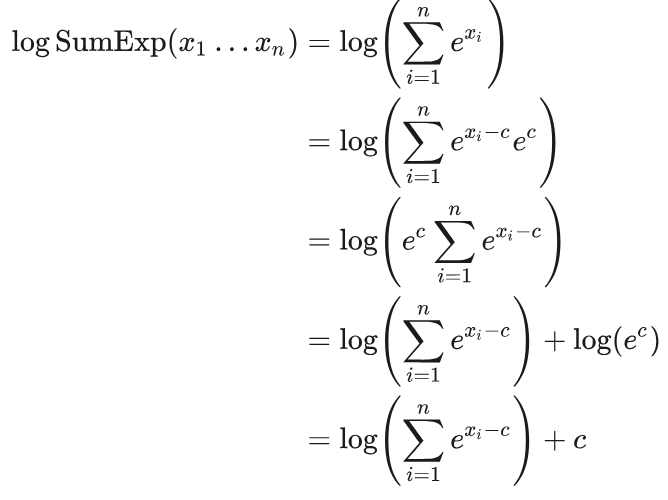

In [8]:
import torch
a = torch.tensor([1000,1000,1000])
print(torch.log(torch.sum(torch.exp(a))), "原始不可计算")
print(torch.logsumexp(a,0),"LSE可计算")

tensor(inf) 原始不可计算
tensor(1001.0986) LSE可计算
